In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
cols = ["idade", "trabalho", "peso", "educacao", "anos_estudo", "estado_civil", "setor_trabalho", "relacionamento", "etnia", "genero", "ganho_capital", "perda_capital", "horas_semana", "pais_origem", "renda"]
df = pd.read_csv('adult.data', names=cols, dtype=str)
y = df.renda
df.drop(columns=['renda'], inplace=True)

In [5]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: renda, Length: 32561, dtype: object

In [4]:
df

,idade,trabalho,peso,educacao,anos_estudo,estado_civil,setor_trabalho,relacionamento,etnia,genero,ganho_capital,perda_capital,horas_semana,pais_origem
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0, stratify=y)

In [8]:
# print(len(y[y==' <=50K'])/len(y), len(y[y==' >50K']))

In [9]:
y = y_train
y_str = y.astype('category')

In [10]:

X_train.idade = X_train.idade.astype(int)
X_train.peso = X_train.peso.astype(int)
X_train.anos_estudo = X_train.anos_estudo.astype(int)
X_train.ganho_capital = X_train.ganho_capital.astype(int)
X_train.perda_capital = X_train.perda_capital.astype(int)
X_train.horas_semana = X_train.horas_semana.astype(int)

X_test.idade = X_test.idade.astype(int)
X_test.peso = X_test.peso.astype(int)
X_test.anos_estudo = X_test.anos_estudo.astype(int)
X_test.ganho_capital = X_test.ganho_capital.astype(int)
X_test.perda_capital = X_test.perda_capital.astype(int)
X_test.horas_semana = X_test.horas_semana.astype(int)

for c in X_train.columns:
    if type(X_train[c].iloc[0]) == str:
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes


In [11]:
for c in X_test.columns:
    # print(X_test[c].iloc[0])
    if type(X_test[c].iloc[0]) == str:
        X_test[c] = X_test[c].astype('category')
        X_test[c] = X_test[c].cat.codes

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=4)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [13]:
preds = clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)

In [15]:
accuracy

0.8420513870406388

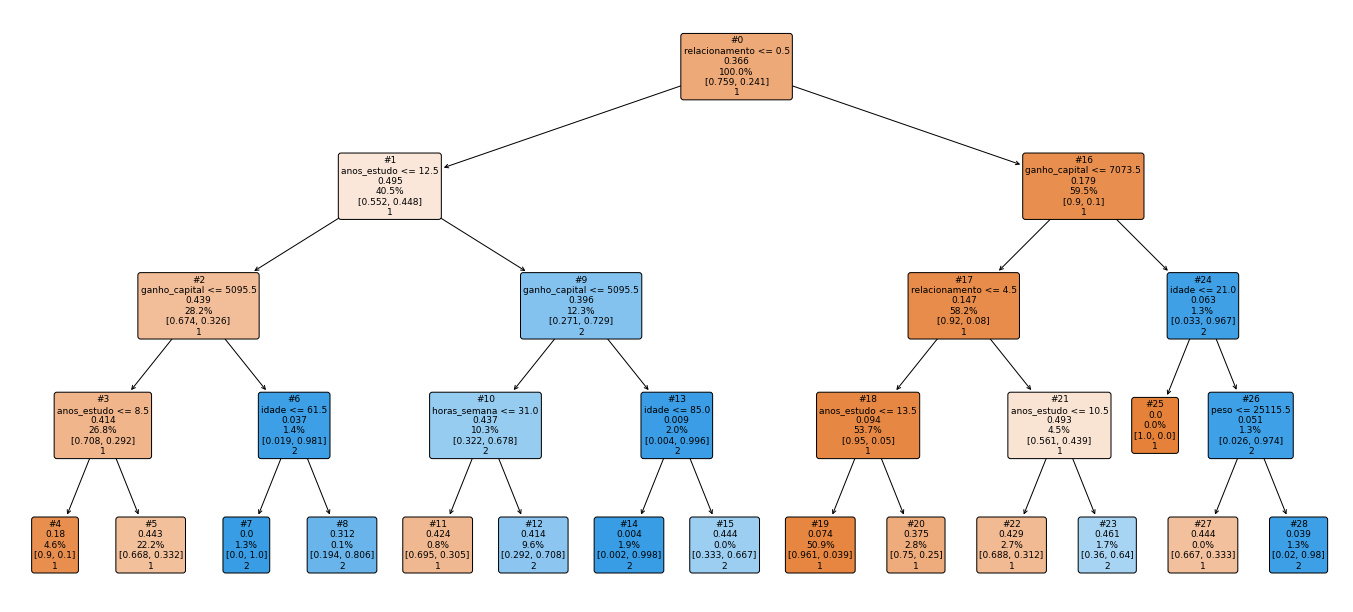

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(24,11))
plt.title('teste')
tree.plot_tree(clf, label=None, node_ids=True, rounded=True, fontsize=9, feature_names=X_train.columns, filled=True, class_names=["1", "2"], proportion=True)
# plt.savefig('decision_tree.png', format='png')
plt.show()